In [1]:
import pandas as pd
import numpy as np
import warnings
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = {'png', 'retina'}

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. EDA


In [2]:
df_train = pd.read_csv("./data/train.csv")
print(df_train.shape)
df_train.tail(5)

(4617600, 4)


,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [3]:
df_key = pd.read_csv("./data/key.csv")
print(df_key.shape)
df_key.tail(5)

(45, 2)


,store_nbr,station_nbr
40,41,12
41,42,14
42,43,11
43,44,12
44,45,16


## station nbr 추가

In [4]:
df_train_key = pd.merge(df_train, df_key, on='store_nbr', how='left')
print(df_train_key.shape)
df_train_key.tail(5)

(4617600, 5)


,date,store_nbr,item_nbr,units,station_nbr
4617595,2014-10-31,45,107,0,16
4617596,2014-10-31,45,108,0,16
4617597,2014-10-31,45,109,0,16
4617598,2014-10-31,45,110,0,16
4617599,2014-10-31,45,111,0,16


In [5]:
df_wal_weather = pd.read_csv("./data/weather.csv")
print(df_wal_weather.shape)
df_wal_weather.tail(5)

(20517, 20)


,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


### weather data column 탐색
- ['station_nbr'] : 변화 없음

- ['date'] : 년/월/일을 새로 추가해준다

In [6]:
def MakeYear(x):
    A = re.search(r'\d\d\d\d', str(x))
    return A.group()

def MakeMonth(x):
    A = re.search(r'-\d\d-', str(x))
    B = re.search(r'\d\d', str(A))
    return B.group()

def MakeDay(x):
    A = re.search(r'(-\d\d)-(\d\d)', str(x))
    return A.group(2)

In [7]:
df_wal_weather['year'] = df_wal_weather['date'].apply(MakeYear)
df_wal_weather['year'].unique()

array(['2012', '2013', '2014'], dtype=object)

In [8]:
df_wal_weather['month'] = df_wal_weather['date'].apply(MakeMonth)
df_wal_weather['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [9]:
df_wal_weather['day'] = df_wal_weather['date'].apply(MakeDay)
df_wal_weather['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

- 요일도 추가한다
- Python starts with 0 = Monday.

In [10]:
def Integerize(x):
    x = int(x)
    return x

In [11]:
df_wal_weather['year'] = df_wal_weather['year'].apply(Integerize)
df_wal_weather['month'] = df_wal_weather['month'].apply(Integerize)
df_wal_weather['day'] = df_wal_weather['day'].apply(Integerize)

In [12]:
import datetime


weekday = list()
for i in range(len(df_wal_weather)):
    weekday.append(datetime.datetime(df_wal_weather['year'][i], df_wal_weather['month'][i], df_wal_weather['day'][i]).weekday())

In [13]:
df_wal_weather['weekday'] = weekday

In [14]:
df_wal_weather.tail(100)

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday
20417,1,2014-10-27,61,41,51,M,38,44,14,0,-,-,,M,0.00,29.70,29.89,6.3,27,7.3,2014,10,27,0
20418,2,2014-10-27,57,41,49,3,37,43,16,0,0614,1648,,0.0,0.00,28.77,29.91,12.0,28,12.3,2014,10,27,0
20419,3,2014-10-27,82,66,74,16,57,63,0,9,0641,1733,VCTS,0.0,0.00,29.04,29.72,12.6,19,16.0,2014,10,27,0
20420,4,2014-10-27,86,62,74,6,61,66,0,9,0641,1748,,0.0,0.00,29.20,29.88,5.0,18,5.6,2014,10,27,0
20421,5,2014-10-27,M,M,M,M,38,M,M,M,0611,1645,,M,M,M,29.91,13.4,28,M,2014,10,27,0
20422,6,2014-10-27,87,53,70,4,59,64,0,5,0641,1748,BCFG BR,0.0,0.00,29.36,29.88,9.1,18,9.3,2014,10,27,0
20423,7,2014-10-27,84,64,74,M,52,60,0,9,-,-,,0.0,0.00,28.42,29.73,7.5,21,15.8,2014,10,27,0
20424,8,2014-10-27,86,61,74,M,64,67,0,9,-,-,HZ,M,0.00,29.55,M,6.3,18,6.5,2014,10,27,0
20425,9,2014-10-27,68,44,56,M,40,47,9,0,-,-,,M,0.00,28.86,29.62,4.9,29,6.8,2014,10,27,0
20426,10,2014-10-27,90,65,78,M,62,67,0,13,0637,1744,BR,M,0.00,30.02,30.06,1.6,16,5.9,2014,10,27,0


## Missing data

In [15]:
for i in df_wal_weather.columns:
    print(i, "\n", df_wal_weather[i].unique())

station_nbr 
 [ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20  5]
date 
 ['2012-01-01' '2012-01-02' '2012-01-03' ..., '2014-10-29' '2014-10-30'
 '2014-10-31']
tmax 
 ['52' '48' '55' '63' '50' '66' '34' '73' '72' '38' '56' '59' '46' '45' '60'
 '44' '21' '65' '43' '53' '25' '32' '28' '62' '61' '47' '30' '26' '71' '58'
 '39' '54' '23' '27' '31' '68' '70' '67' '36' '69' '74' '75' '33' '51' '57'
 '41' '49' '76' '35' '77' '64' '40' '16' '37' '42' '14' '22' '13' '10' '20'
 '24' '80' '4' '11' '78' '17' '18' '79' '29' '81' '82' '83' '88' '87' '92'
 '89' '84' '85' '86' '90' '91' '94' '93' '96' '95' 'M' '97' '98' '101' '99'
 '100' '105' '103' '102' '106' '104' '109' '107' '108' '110' '111' '112'
 '114' '113' '19' '15' '12' '-1' '5' '8' '9' '1' '6' '2' '3' '7' '-2' '-11'
 '-4' '-6' '0']
tmin 
 ['31' '33' '34' '47' '45' '19' '53' '48' '18' '26' '30' '38' '40' '25' '41'
 '28' '24' '37' '36' '11' '16' '29' '22' '35' '15' '9' '21' '27' '10' '5'
 '32' '20' '3' '8' '44' '46' '17' '55' '43' '57

In [16]:
for i in df_wal_weather.columns:
    df_wal_weather[i] = df_wal_weather[i].replace('-', np.nan)
    df_wal_weather[i] = df_wal_weather[i].replace(' ', np.nan)
    df_wal_weather[i] = df_wal_weather[i].replace('M', np.nan)

In [17]:
for i in df_wal_weather.columns:
    print(i, "\n", df_wal_weather[i].unique())

station_nbr 
 [ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20  5]
date 
 ['2012-01-01' '2012-01-02' '2012-01-03' ..., '2014-10-29' '2014-10-30'
 '2014-10-31']
tmax 
 ['52' '48' '55' '63' '50' '66' '34' '73' '72' '38' '56' '59' '46' '45' '60'
 '44' '21' '65' '43' '53' '25' '32' '28' '62' '61' '47' '30' '26' '71' '58'
 '39' '54' '23' '27' '31' '68' '70' '67' '36' '69' '74' '75' '33' '51' '57'
 '41' '49' '76' '35' '77' '64' '40' '16' '37' '42' '14' '22' '13' '10' '20'
 '24' '80' '4' '11' '78' '17' '18' '79' '29' '81' '82' '83' '88' '87' '92'
 '89' '84' '85' '86' '90' '91' '94' '93' '96' '95' nan '97' '98' '101' '99'
 '100' '105' '103' '102' '106' '104' '109' '107' '108' '110' '111' '112'
 '114' '113' '19' '15' '12' '-1' '5' '8' '9' '1' '6' '2' '3' '7' '-2' '-11'
 '-4' '-6' '0']
tmin 
 ['31' '33' '34' '47' '45' '19' '53' '48' '18' '26' '30' '38' '40' '25' '41'
 '28' '24' '37' '36' '11' '16' '29' '22' '35' '15' '9' '21' '27' '10' '5'
 '32' '20' '3' '8' '44' '46' '17' '55' '43' '57

In [18]:
df_wal_weather.tail(5)

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday
20512,16,2014-10-31,53,34,44,NaN,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3,2014,10,31,4
20513,17,2014-10-31,59,34,47,NaN,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,2014,10,31,4
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2,2014,10,31,4
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,2014,10,31,4
20516,20,2014-10-31,68,50,59,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,2014,10,31,4


In [19]:
#missingdata 찾기
def graph_na(data_train):
    plt.figure()
    missing_data_count = data_train.isnull().sum()
    missing_data_count.sort_values(ascending = False, inplace = True)
    missing_data_count_filtered = missing_data_count[missing_data_count > 0]
    missing_data_count_filtered.plot(kind = 'bar', title = 'missing data count')
    plt.show()

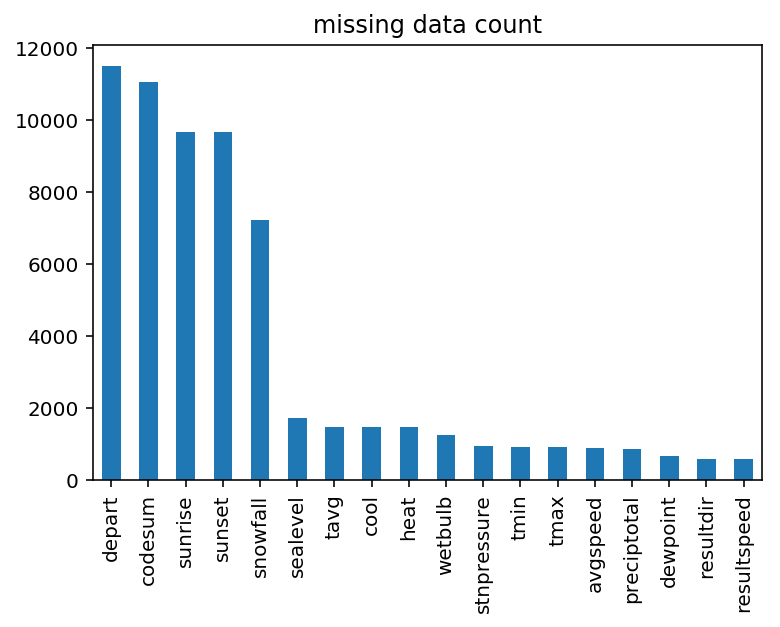

In [20]:
graph_na(df_wal_weather)

In [25]:
df_wal_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday
20512,16,2014-10-31,53,34,44,NaN,35,41,21,0,NaN,NaN,NaN,NaN,0.00,29.90,29.99,4.5,03,5.3,2014,10,31,4
20513,17,2014-10-31,59,34,47,NaN,32,41,18,0,NaN,NaN,RA,0.0,0.00,29.72,30.39,9.2,01,9.3,2014,10,31,4
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,NaN,0.0,0.00,29.78,30.28,10.6,36,11.2,2014,10,31,4
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9,2014,10,31,4
20516,20,2014-10-31,68,50,59,NaN,39,50,6,0,NaN,NaN,NaN,0.0,0.00,29.57,30.27,10.5,36,11.2,2014,10,31,4


In [26]:
type(df_wal_weather['tmax'][0])

str

In [28]:
def Floaterize(x):
    x = float(x)
    return x

In [29]:
df_wal_weather['tmax'] = df_wal_weather['tmax'].apply(Floaterize)
df_wal_weather['tmin'] = df_wal_weather['tmin'].apply(Floaterize)
df_wal_weather['tavg'] = df_wal_weather['tavg'].apply(Floaterize)
df_wal_weather['depart'] = df_wal_weather['depart'].apply(Floaterize)

In [30]:
type(df_wal_weather['tmax'][0])

numpy.float64

In [31]:
df_wal_weather.describe()

,station_nbr,tmax,tmin,tavg,depart,year,month,day,weekday
count,20517.000000,19611.000000,19609.000000,19048.000000,9006.000000,20517.000000,20517.000000,20517.000000,20517.000000
mean,10.549057,71.621131,50.654546,61.240130,1.363091,2012.946971,6.249208,15.731150,2.998050
std,5.768533,19.847451,19.139055,19.194357,7.646759,0.801828,3.321448,8.801119,2.000097
min,1.000000,-11.000000,-21.000000,-16.000000,-35.000000,2012.000000,1.000000,1.000000,0.000000
25%,6.000000,59.000000,37.000000,48.000000,-3.000000,2012.000000,3.000000,8.000000,1.000000
50%,11.000000,76.000000,53.000000,65.000000,2.000000,2013.000000,6.000000,16.000000,3.000000
75%,16.000000,87.000000,67.000000,77.000000,6.000000,2014.000000,9.000000,23.000000,5.000000
max,20.000000,114.000000,88.000000,100.000000,33.000000,2014.000000,12.000000,31.000000,6.000000


In [32]:
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

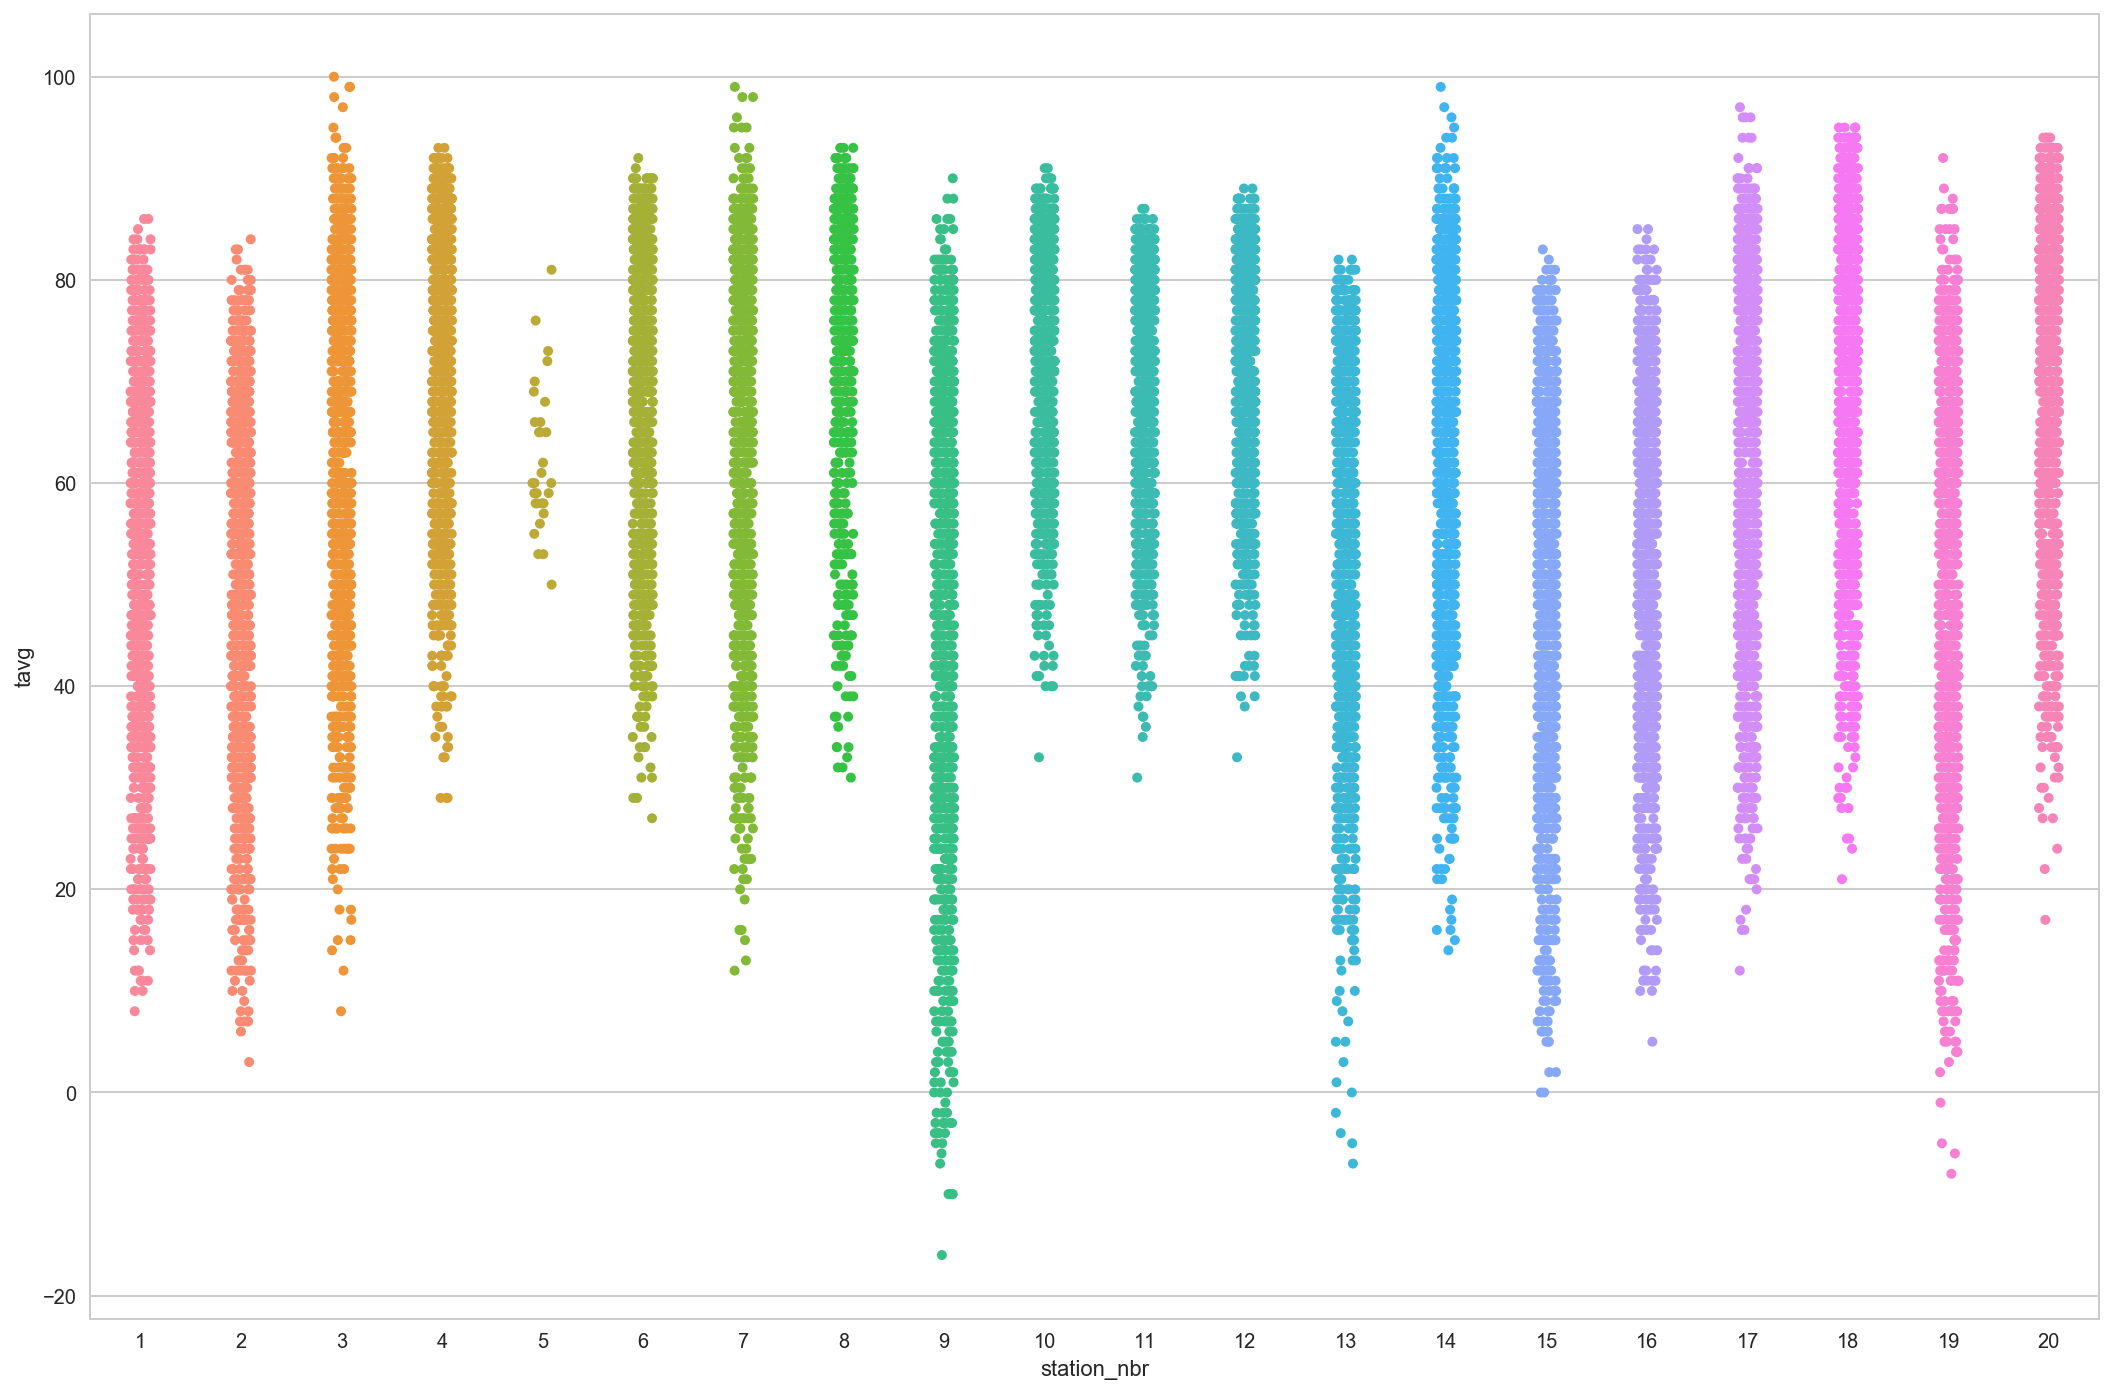

In [57]:
plt.figure(figsize=(18,12))
sns.stripplot(x="station_nbr", y="tavg", data=df_wal_weather, jitter=True)
plt.show()